In [1]:
import pandas as pd

In [7]:
enzyme_list = pd.read_csv("lab_enzymes_3c.bed", sep="\t", names=['Chr', 'cutsite', 'name'])
enzyme_list

,Chr,cutsite,name
0,I,24034,ApaI
1,I,24197,ApaI
2,I,40044,ApaI
3,I,41872,ApaI
4,I,50125,ApaI
...,...,...,...
2599084,MtDNA,7438,XbaI
2599085,MtDNA,4560,XbaI
2599086,MtDNA,1506,XbaI
2599087,MtDNA,926,MboI


In [8]:
chromosomes = enzyme_list['Chr'].unique()
print(chromosomes)
enzymes = enzyme_list['name'].unique()
print(enzymes)

Chrom_sizes = {
    'I' : 15072434,
    'II' : 15279421,
    'III' : 13783801,
    'IV' : 17493829,
    'V' : 20924180,
    'X' : 17718942,
    'MtDNA' : 13794
}
print(Chrom_sizes)

['I' 'II' 'III' 'IV' 'V' 'X' 'MtDNA']
['ApaI' 'NaeI' 'SacII' 'KpnI-HF' 'Pstl-HF' 'AflII' 'BglII' 'SalI-HF'
 'NheI' 'EagI-HF' 'NdeI' 'XhoI' 'BamHI-HF' 'NcoI' 'SapI' 'EcoRV-HF' 'PmlI'
 'PvuII' 'XbaI' 'HindIII-HF' 'SacI-HF' 'EcoRI-HF' 'BsmAI' 'HpaII' 'MboI'
 'DraI' 'DpnI']
{'I': 15072434, 'II': 15279421, 'III': 13783801, 'IV': 17493829, 'V': 20924180, 'X': 17718942, 'MtDNA': 13794}


In [9]:
enzyme_list.query('Chr == "I"')

,Chr,cutsite,name
0,I,24034,ApaI
1,I,24197,ApaI
2,I,40044,ApaI
3,I,41872,ApaI
4,I,50125,ApaI
...,...,...,...
410712,I,3974,DpnI
410713,I,3749,DpnI
410714,I,3680,DpnI
410715,I,2674,DpnI


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print(enzymes)
def digest(zyme1, zyme2):
    all_chr_fragment_lengths = []
    for chr in chromosomes:
        enzyme_1_df = enzyme_list.query('Chr == @chr & name == @zyme1')
        enzyme_2_df = enzyme_list.query('Chr == @chr & name == @zyme2')
        # Querying the chromosomes and enzymes provided and return a new dataframe
        list_of_enzyme_1_cutsites = enzyme_1_df['cutsite'].to_list()
        list_of_enzyme_2_cutsites = enzyme_2_df['cutsite'].to_list()
        # Making lists for the two enzyme cutting sites
        all_cutsites_list = list_of_enzyme_1_cutsites + list_of_enzyme_2_cutsites
        all_cutsites_list.append(1)
        all_cutsites_list.append(Chrom_sizes[chr])
        # Merging the two lists into one and add "1" and "chromosome length" to the list
        set_of_all_cutsites = set(all_cutsites_list)
        all_cutsites_list = list(set_of_all_cutsites)
        # Render the cut sites unique before sorting
        all_cutsites_list.sort()

        fragment_length = []
        last_position = 0
        for i in all_cutsites_list:
            if(last_position == 0):
                last_position = i
            else:
                fragment_length.append(i - last_position)
                last_position = i
        for item in fragment_length:
            all_chr_fragment_lengths.append(item)
        # Making the difference between the adjacent two items in the list 

    #plt.figure(figsize=(10, 6))
    plt.hist(all_chr_fragment_lengths, bins=100,  range=(0,30000),  label=str(zyme1 + ' & ' + zyme2 ))
    plt.title(str(zyme1 + ' & ' + zyme2 ))
    q95 = np.quantile(all_chr_fragment_lengths, q=0.95)
    q05 = np.quantile(all_chr_fragment_lengths, q=0.05)
    plt.text(15000, 4000, "95 quantile: " + str(round(q95)))
    plt.text(15000, 2000, "5 quantile: " + str(round(q05)))
    #plt.xlim(0,df['length'].max())
    plt.savefig(zyme1 + " & " + zyme2)
    plt.show()

['ApaI' 'NaeI' 'SacII' 'KpnI-HF' 'Pstl-HF' 'AflII' 'BglII' 'SalI-HF'
 'NheI' 'EagI-HF' 'NdeI' 'XhoI' 'BamHI-HF' 'NcoI' 'SapI' 'EcoRV-HF' 'PmlI'
 'PvuII' 'XbaI' 'HindIII-HF' 'SacI-HF' 'EcoRI-HF' 'BsmAI' 'HpaII' 'MboI'
 'DraI' 'DpnI']


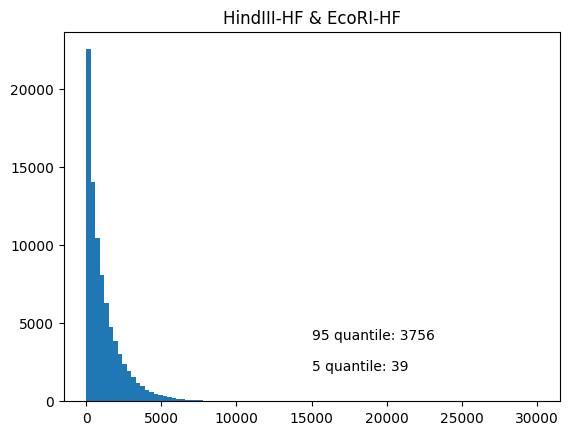

In [23]:
digest("HindIII-HF", "EcoRI-HF")